# Time Analysis of Quality of life
In this notebook we are going to explore various time dependent
developments of the rankings of the cities.


In [43]:
from src.data_preparation.Response_Variable import ReponseVariableScraper
import pandas as pd
european_countries=["Switzerland","Netherlands","Denmark",
"Austria","Luxembourg","Iceland","United Kingdom","Germany",
"Spain","Estonia","Sweden","Ireland","Slovenia","Lithuania",
        "Turkey","Czech Republic","Norway","Croatia",
        "France","Belgium","Portugal","Cyprus","Romania","Poland","Slovakia",
        "Latvia","Russia","Italy","Bulgaria","Serbia","Greece",
"Hungary","Ukraine"]

def filter_europe(df):
    df=df[df["Country"].isin(european_countries)]
    return df


data_scraper = ReponseVariableScraper()



Here we are going to explore the cities which were consistently amongst the top 10 over the timespan of 8 years.




In [44]:
import numpy as np
data={}
for year in range(2012,2021):
    data[year]=data_scraper.get_year(year)
    data[year]=filter_europe(data[year])
    data[year]["Top_10"]=0
all_cities=[]
for year in range(2012,2021):
    all_cities.extend(data[year]["City"].unique())

all_cities=np.unique(all_cities)
cities=pd.DataFrame(columns=["City","Top_10"])
cities["City"]=all_cities
cities["Top_10"]=0
for year in range(2012,2021):
    df=data[year]
    candidates=df[df["Rank"]<=10]["City"].to_list()
    idx=cities["City"].isin(candidates)
    cities["Top_10"].loc[idx]+=1
cities.sort_values(by=["Top_10"],ascending=False,inplace=True)


/home/nikolas/PycharmProjects/DOP_EX1/venv/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/nikolas/PycharmProjects/DOP_EX1/venv/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/nikolas/PycharmProjects/DOP_EX1/venv/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

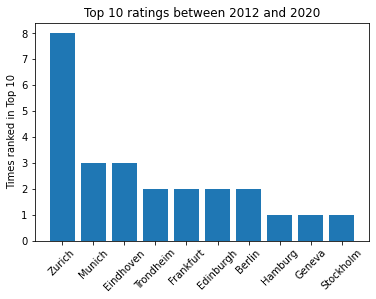

In [45]:
import matplotlib.pyplot as plt

plt.bar(x=cities.head(10)["City"],height=cities.head(10)["Top_10"])
plt.title("Top 10 ratings between 2012 and 2020")
plt.ylabel("Times ranked in Top 10")
plt.xticks(rotation=45)

         City  Top_10
91     Zurich       8
56     Munich       3
29  Eindhoven       3
81  Trondheim       2
30  Frankfurt       2
28  Edinburgh       2
8      Berlin       2
36    Hamburg       1
32     Geneva       1
74  Stockholm       1


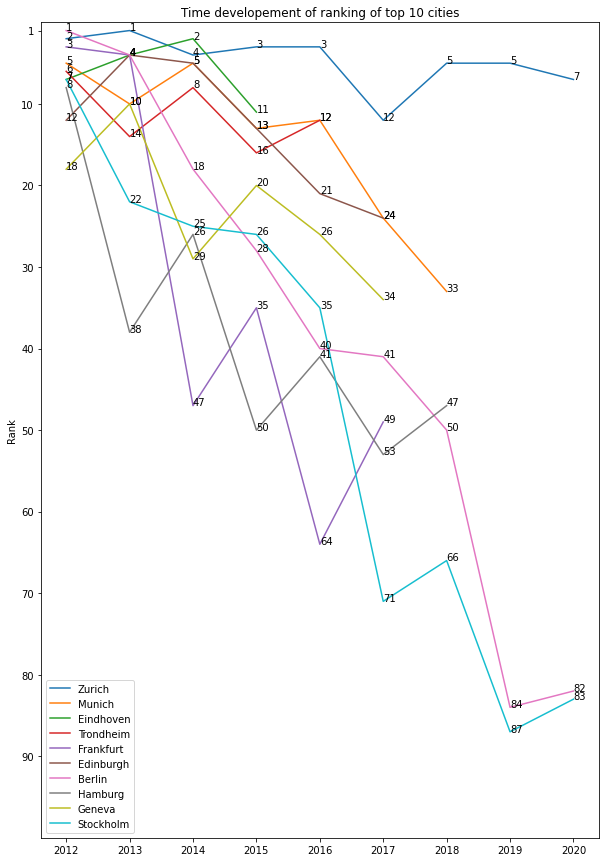

In [46]:
top_10=cities.head(10)
print(top_10)
time_dependency_top_10={}
for city in top_10["City"]:
    time_dependency_top_10[city]=[]
    for year in range(2012,2021):
        d=data[year]
        time_dependency_top_10[city].extend(d[d["City"]==city]["Rank"].to_list())
plt.figure(figsize=(10,15))
for time in time_dependency_top_10.keys():
    p=time_dependency_top_10[time]
    plt.plot(time_dependency_top_10[time])
    for j,i in zip(time_dependency_top_10[time],range(0,9)):
            plt.text(i,j,str(j))
plt.ylim(100,0)
plt.xticks(np.arange(9),("2012","2013","2014","2015","2016","2017","2018","2019","2020"))
plt.yticks((1,10,20,30,40,50,60,70,80,90))
plt.ylabel("Rank")
plt.title("Time developement of ranking of top 10 cities")
plt.legend(top_10["City"])
plt.show()

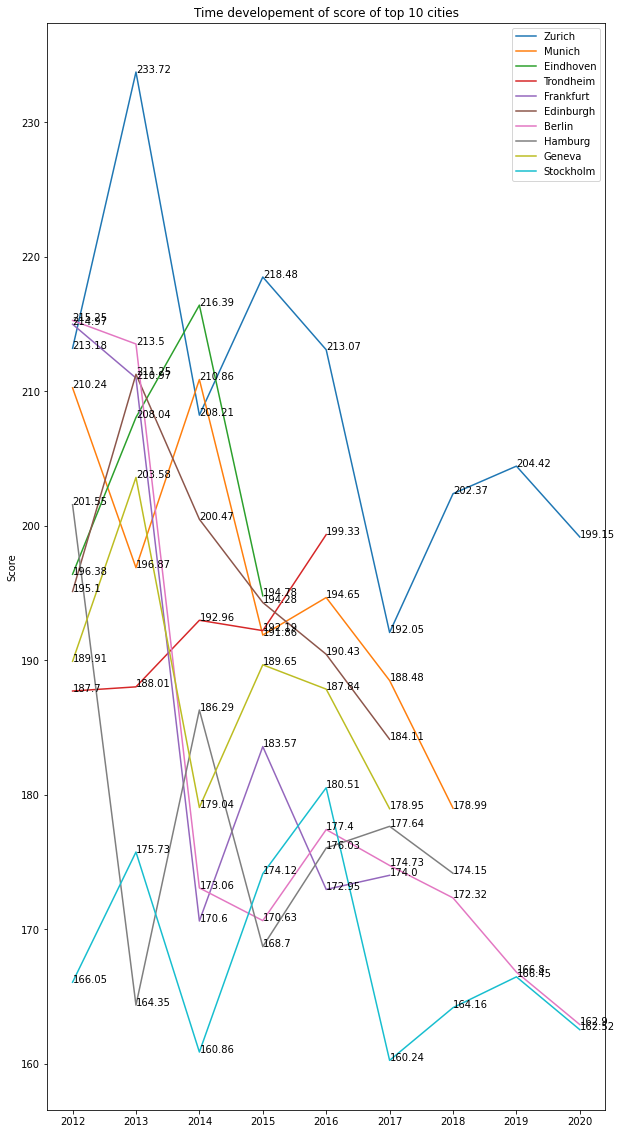

In [52]:
for city in top_10["City"]:
    time_dependency_top_10[city]=[]
    for year in range(2012,2021):
        d=data[year]
        time_dependency_top_10[city].extend(d[d["City"]==city]["Quality of Life Index"].to_list())
plt.figure(figsize=(10,20))
for time in time_dependency_top_10.keys():
    p=time_dependency_top_10[time]
    plt.plot(time_dependency_top_10[time])
    for j,i in zip(time_dependency_top_10[time],range(0,9)):
            plt.text(i,j,str(j))
plt.xticks(np.arange(9),("2012","2013","2014","2015","2016","2017","2018","2019","2020"))
plt.ylabel("Score")
plt.title("Time developement of score of top 10 cities")
plt.legend(top_10["City"])
plt.show()

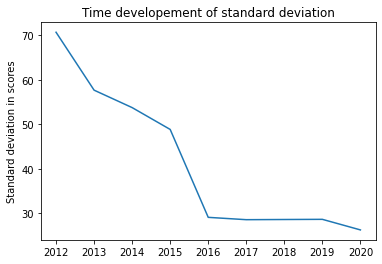

In [55]:
std=[]
for year in range(2012,2021):
    std.append(np.std(data[year]["Quality of Life Index"]))

plt.plot(std)
plt.xticks(np.arange(9),("2012","2013","2014","2015","2016","2017","2018","2019","2020"))
plt.title("Time developement of standard deviation")
plt.ylabel("Standard deviation in scores")
plt.show()